In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

1. Load Data and Split the Data

In [3]:
# Load dataset
df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display basic info and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5                    1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [4]:
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-08-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-08-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-08-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-08-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-08-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-08-05 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-08-05 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-08-05 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-08-05 15:33:00,Cash,65.82,4.761905,3.2910,4.1


2. create new dataframe from specific columns

In [5]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Display the first few rows of the aggregated sales data
sales_by_date=pd.DataFrame(sales_by_date)

In [6]:
# Aggregate additional columns by date and city separately
additional_columns = df.groupby(['date', 'branch'])
additional_columns

#### notes 
* create new fetures 

In [7]:
# Create a new DataFrame with the specified columns
df1 = df[['date', 'unit_price', 'quantity', 'branch', 'rating', 'day', 'month', 'year', 'total']]
# Sort the DataFrame by date in ascending order
df1 = df1.sort_values(by='date')
df1

,date,unit_price,quantity,branch,rating,day,month,year,total
856,2019-01-01,21.12,8,B,6.3,1,1,2019,177.408
567,2019-01-01,65.74,9,A,7.7,1,1,2019,621.243
245,2019-01-01,47.59,8,A,5.7,1,1,2019,399.756
696,2019-01-01,27.04,4,A,6.9,1,1,2019,113.568
523,2019-01-01,62.87,2,C,5.0,1,1,2019,132.027
...,...,...,...,...,...,...,...,...,...
158,2019-03-30,97.22,9,B,6.0,30,3,2019,918.729
881,2019-03-30,10.18,8,C,9.5,30,3,2019,85.512
963,2019-03-30,96.82,3,C,6.7,30,3,2019,304.983
937,2019-03-30,89.48,5,A,7.4,30,3,2019,469.770


3. EDA to see total sales over time in all branches A, B , C

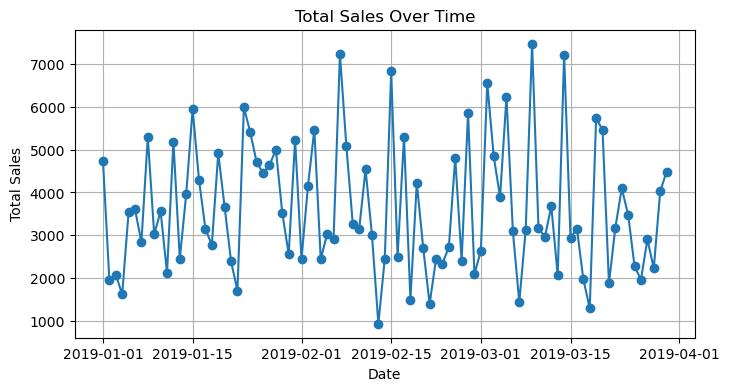

In [8]:
# Plot the total sales over time
plt.figure(figsize=(8, 4))
plt.plot(sales_by_date['date'], sales_by_date['total'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Date')

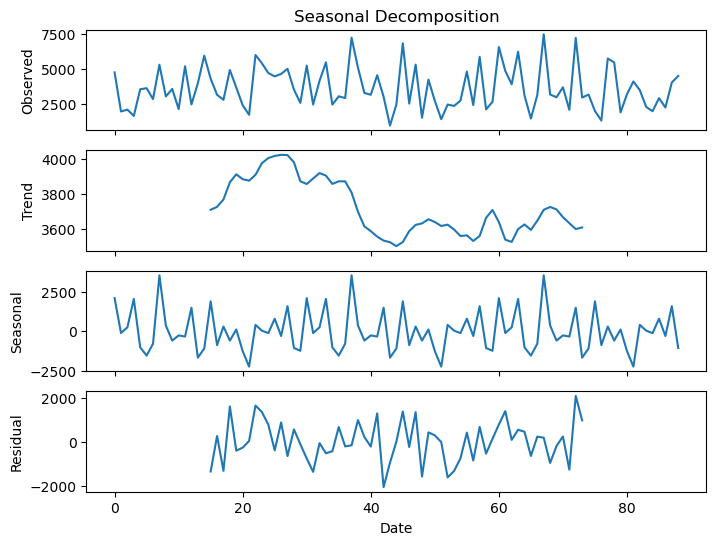

In [9]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_by_date['total'], model='additive', period=30)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_19682/3142198014.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


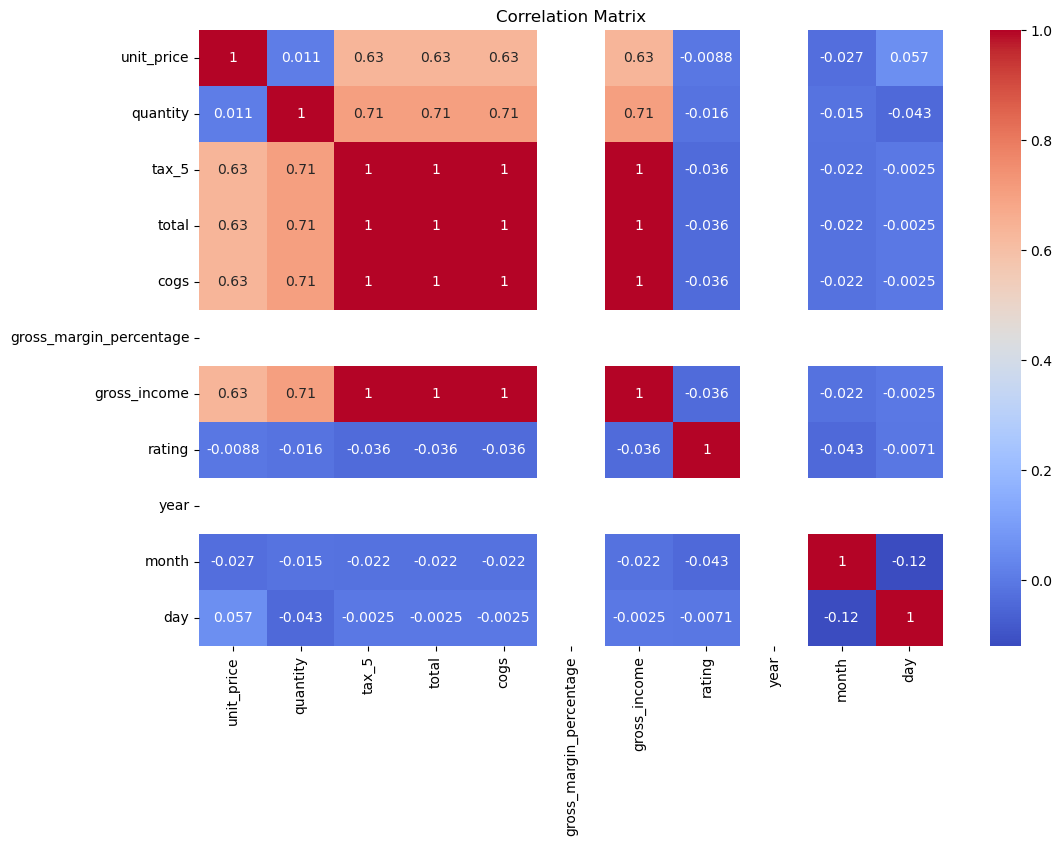

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Feature engineering 

Chabe this to 1 hot encoding 

In [11]:
# Encode the branch column
label_encoder = LabelEncoder()
df1['branch_encoded'] = label_encoder.fit_transform(df1['branch'])
df1 = df1.drop(columns=['branch'])
df1

,date,unit_price,quantity,rating,day,month,year,total,branch_encoded
856,2019-01-01,21.12,8,6.3,1,1,2019,177.408,1
567,2019-01-01,65.74,9,7.7,1,1,2019,621.243,0
245,2019-01-01,47.59,8,5.7,1,1,2019,399.756,0
696,2019-01-01,27.04,4,6.9,1,1,2019,113.568,0
523,2019-01-01,62.87,2,5.0,1,1,2019,132.027,2
...,...,...,...,...,...,...,...,...,...
158,2019-03-30,97.22,9,6.0,30,3,2019,918.729,1
881,2019-03-30,10.18,8,9.5,30,3,2019,85.512,2
963,2019-03-30,96.82,3,6.7,30,3,2019,304.983,2
937,2019-03-30,89.48,5,7.4,30,3,2019,469.770,0


split the dtaset for 3 datasets for each branch

In [12]:
# Create separate DataFrames for each branch
branch_a_df = df1[df1['branch_encoded'] == label_encoder.transform(['A'])[0]]
branch_b_df = df1[df1['branch_encoded'] == label_encoder.transform(['B'])[0]]
branch_c_df = df1[df1['branch_encoded'] == label_encoder.transform(['C'])[0]]

In [13]:
# Aggregate data for branch A
branch_a_agg = branch_a_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

# Aggregate data for branch B
branch_b_agg = branch_b_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

# Aggregate data for branch C
branch_c_agg = branch_c_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

#### Here i should apply lag - feature engineering 

In [14]:
branch_a_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,57.440000,37,6.300,1,1,2019,2371.3200
1,2019-01-02,42.065000,7,5.650,2,1,2019,307.0515
2,2019-01-03,53.376667,19,7.500,3,1,2019,937.4085
3,2019-01-04,28.255000,15,7.400,4,1,2019,483.2625
4,2019-01-05,68.974000,27,6.220,5,1,2019,2024.5050
...,...,...,...,...,...,...,...,...
84,2019-03-26,44.758333,25,6.350,26,3,2019,1187.3400
85,2019-03-27,51.612000,22,6.680,27,3,2019,1060.6260
86,2019-03-28,48.140000,35,7.000,28,3,2019,1652.9310
87,2019-03-29,71.900000,13,6.950,29,3,2019,977.6130


In [15]:
branch_b_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960
1,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015
2,2019-01-03,72.843333,15,8.533333,3,1,2019,1016.6940
3,2019-01-04,62.433333,8,4.866667,4,1,2019,510.5835
4,2019-01-05,60.180000,11,7.933333,5,1,2019,486.7590
...,...,...,...,...,...,...,...,...
81,2019-03-26,32.373333,13,8.433333,26,3,2019,301.2030
82,2019-03-27,52.632500,14,6.900000,27,3,2019,898.8945
83,2019-03-28,30.370000,3,5.100000,28,3,2019,95.6655
84,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320


In [16]:
branch_c_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,48.072500,20,6.375,1,1,2019,837.1650
1,2019-01-02,65.745000,10,6.150,2,1,2019,475.6500
2,2019-01-03,48.500000,3,8.400,3,1,2019,124.0260
3,2019-01-04,66.650000,9,9.700,4,1,2019,629.8425
4,2019-01-05,53.557500,17,8.575,5,1,2019,1025.4195
...,...,...,...,...,...,...,...,...
83,2019-03-26,48.242500,14,5.675,26,3,2019,473.9700
84,2019-03-27,99.820000,9,6.600,27,3,2019,943.2990
85,2019-03-28,45.346667,10,7.800,28,3,2019,480.8055
86,2019-03-29,55.590000,14,5.350,29,3,2019,985.6980


Create 1 dataset for the 3 branches 

In [17]:
# Add branch identifier
branch_a_agg['branch'] = 'A'
branch_b_agg['branch'] = 'B'
branch_c_agg['branch'] = 'C'

# Concatenate the DataFrames
combined_df = pd.concat([branch_a_agg, branch_b_agg, branch_c_agg], ignore_index=True)


# Convert the 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Sort the dataset by the 'date' column
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)
combined_df 



,date,unit_price,quantity,rating,day,month,year,total,branch
0,2019-01-01,57.440000,37,6.300000,1,1,2019,2371.3200,A
1,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960,B
2,2019-01-01,48.072500,20,6.375000,1,1,2019,837.1650,C
3,2019-01-02,42.065000,7,5.650000,2,1,2019,307.0515,A
4,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015,B
...,...,...,...,...,...,...,...,...,...
258,2019-03-29,55.590000,14,5.350000,29,3,2019,985.6980,C
259,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320,B
260,2019-03-30,57.142500,23,7.775000,30,3,2019,1320.6165,A
261,2019-03-30,87.730000,19,5.366667,30,3,2019,1724.4570,B


encode Branh column usin one hot encoding 

In [18]:
# Encoding Categorical Variables
# One-hot encode the 'branch' column
encoder = OneHotEncoder(drop='first', sparse=False)
branch_encoded = encoder.fit_transform(combined_df[['branch']])

# Create a DataFrame with the one-hot encoded branch data
branch_encoded_df = pd.DataFrame(branch_encoded, columns=encoder.get_feature_names_out(['branch']))

# Concatenate the one-hot encoded columns to the original dataframe
combined_df_encoded = pd.concat([combined_df.drop(columns=['branch']), branch_encoded_df], axis=1)
combined_df_encoded



,date,unit_price,quantity,rating,day,month,year,total,branch_B,branch_C
0,2019-01-01,57.440000,37,6.300000,1,1,2019,2371.3200,0.0,0.0
1,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960,1.0,0.0
2,2019-01-01,48.072500,20,6.375000,1,1,2019,837.1650,0.0,1.0
3,2019-01-02,42.065000,7,5.650000,2,1,2019,307.0515,0.0,0.0
4,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
258,2019-03-29,55.590000,14,5.350000,29,3,2019,985.6980,0.0,1.0
259,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320,1.0,0.0
260,2019-03-30,57.142500,23,7.775000,30,3,2019,1320.6165,0.0,0.0
261,2019-03-30,87.730000,19,5.366667,30,3,2019,1724.4570,1.0,0.0


Shift Lag and Rolling Lag Moving Average:
Shift quantity and unit_price by 1 period to create lagged versions.



In [19]:
# Create lagged versions of 'quantity' and 'unit_price'
combined_df_encoded['quantity_lag1'] = combined_df_encoded['quantity'].shift(1)
combined_df_encoded['unit_price_lag1'] = combined_df_encoded['unit_price'].shift(1)

# Create rolling averages of 'quantity' and 'unit_price' with a window of 7
combined_df_encoded['quantity_roll7'] = combined_df_encoded['quantity'].rolling(window=7).mean()
combined_df_encoded['unit_price_roll7'] = combined_df_encoded['unit_price'].rolling(window=7).mean()
combined_df_encoded



,date,unit_price,quantity,rating,day,month,year,total,branch_B,branch_C,quantity_lag1,unit_price_lag1,quantity_roll7,unit_price_roll7
0,2019-01-01,57.440000,37,6.300000,1,1,2019,2371.3200,0.0,0.0,NaN,NaN,NaN,NaN
1,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960,1.0,0.0,37.0,57.440000,NaN,NaN
2,2019-01-01,48.072500,20,6.375000,1,1,2019,837.1650,0.0,1.0,24.0,60.153333,NaN,NaN
3,2019-01-02,42.065000,7,5.650000,2,1,2019,307.0515,0.0,0.0,20.0,48.072500,NaN,NaN
4,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015,1.0,0.0,7.0,42.065000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2019-03-29,55.590000,14,5.350000,29,3,2019,985.6980,0.0,1.0,13.0,71.900000,15.142857,57.539810
259,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320,1.0,0.0,14.0,55.590000,17.714286,53.129452
260,2019-03-30,57.142500,23,7.775000,30,3,2019,1320.6165,0.0,0.0,27.0,68.947500,17.857143,53.919524
261,2019-03-30,87.730000,19,5.366667,30,3,2019,1724.4570,1.0,0.0,23.0,57.142500,15.571429,59.575238


##### Transform Day collumn to  sine and cosin  

In [20]:
# Step 2: Transform 'day' column into sine and cosine components
combined_df_encoded['day_sin'] = np.sin(2 * np.pi * combined_df_encoded['day'] / 31)
combined_df_encoded['day_cos'] = np.cos(2 * np.pi * combined_df_encoded['day'] / 31)
combined_df_encoded

,date,unit_price,quantity,rating,day,month,year,total,branch_B,branch_C,quantity_lag1,unit_price_lag1,quantity_roll7,unit_price_roll7,day_sin,day_cos
0,2019-01-01,57.440000,37,6.300000,1,1,2019,2371.3200,0.0,0.0,NaN,NaN,NaN,NaN,0.201299,0.979530
1,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960,1.0,0.0,37.0,57.440000,NaN,NaN,0.201299,0.979530
2,2019-01-01,48.072500,20,6.375000,1,1,2019,837.1650,0.0,1.0,24.0,60.153333,NaN,NaN,0.201299,0.979530
3,2019-01-02,42.065000,7,5.650000,2,1,2019,307.0515,0.0,0.0,20.0,48.072500,NaN,NaN,0.394356,0.918958
4,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015,1.0,0.0,7.0,42.065000,NaN,NaN,0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2019-03-29,55.590000,14,5.350000,29,3,2019,985.6980,0.0,1.0,13.0,71.900000,15.142857,57.539810,-0.394356,0.918958
259,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320,1.0,0.0,14.0,55.590000,17.714286,53.129452,-0.394356,0.918958
260,2019-03-30,57.142500,23,7.775000,30,3,2019,1320.6165,0.0,0.0,27.0,68.947500,17.857143,53.919524,-0.201299,0.979530
261,2019-03-30,87.730000,19,5.366667,30,3,2019,1724.4570,1.0,0.0,23.0,57.142500,15.571429,59.575238,-0.201299,0.979530


##### dropping the nulll Values will leave to loss of 7 rows, which is 2.3 percent of the dat. 

In [21]:
# Calculate the number of rows before dropping NaN values
rows_before = combined_df_encoded.shape[0]

# Drop rows with NaN values
combined_df_encoded_dropped = combined_df_encoded.dropna().reset_index(drop=True)

# Calculate the number of rows after dropping NaN values
rows_after = combined_df_encoded_dropped.shape[0]

# Number of rows lost
rows_lost = rows_before - rows_after

rows_before, rows_after, rows_lost

(263, 257, 6)

In [22]:
# Drop rows with NaN values resulting from the lag and rolling operations
combined_df_encoded = combined_df_encoded.dropna().reset_index(drop=True)
combined_df_encoded


,date,unit_price,quantity,rating,day,month,year,total,branch_B,branch_C,quantity_lag1,unit_price_lag1,quantity_roll7,unit_price_roll7,day_sin,day_cos
0,2019-01-03,53.376667,19,7.500000,3,1,2019,937.4085,0.0,0.0,10.0,65.745000,21.142857,51.745357,0.571268,0.820763
1,2019-01-03,48.500000,3,8.400000,3,1,2019,124.0260,0.0,1.0,19.0,53.376667,16.285714,50.468214,0.571268,0.820763
2,2019-01-03,72.843333,15,8.533333,3,1,2019,1016.6940,1.0,0.0,3.0,48.500000,15.000000,52.281071,0.571268,0.820763
3,2019-01-04,66.650000,9,9.700000,4,1,2019,629.8425,0.0,1.0,15.0,72.843333,13.428571,54.935000,0.724793,0.688967
4,2019-01-04,62.433333,8,4.866667,4,1,2019,510.5835,1.0,0.0,9.0,66.650000,13.571429,57.844762,0.724793,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2019-03-29,55.590000,14,5.350000,29,3,2019,985.6980,0.0,1.0,13.0,71.900000,15.142857,57.539810,-0.394356,0.918958
253,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320,1.0,0.0,14.0,55.590000,17.714286,53.129452,-0.394356,0.918958
254,2019-03-30,57.142500,23,7.775000,30,3,2019,1320.6165,0.0,0.0,27.0,68.947500,17.857143,53.919524,-0.201299,0.979530
255,2019-03-30,87.730000,19,5.366667,30,3,2019,1724.4570,1.0,0.0,23.0,57.142500,15.571429,59.575238,-0.201299,0.979530


#### 5. Modeling


#### linear regression 

drop features i dont want to use 

In [32]:


# Drop unnecessary columns
features_to_drop = ['date', 'quantity', 'day']
X = combined_df_encoded.drop(columns=features_to_drop)

# Define the target variable, which is the 'total' shifted by -1 to predict the next day
y = combined_df_encoded['total'].shift(-1)

# Drop 'total' from the features
X = X.drop(columns=['total'])

# Drop rows with NaN values from both X and y to ensure they are aligned
X = X.iloc[:-1, :]
y = y.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(738130.3137708202, -0.12646890558148915)

#### Split branch A  Data to train and test 

In [23]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

branch_a_agg['date'] = pd.to_datetime(branch_a_agg['date'])

# Split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Prepare the data
X_a = branch_a_agg[['unit_price', 'quantity', 'rating', 'day', 'month', 'year']]
y_a = branch_a_agg['total']

for train_index, test_index in tscv.split(X_a):
    X_train_a, X_test_a = X_a.iloc[train_index], X_a.iloc[test_index]
    y_train_a, y_test_a = y_a.iloc[train_index], y_a.iloc[test_index]
    break  # Only using the first split for demonstration

# Display the training and testing data
print("X_train_a:\n", X_train_a)
print("X_test_a:\n", X_test_a)
print("y_train_a:\n", y_train_a)
print("y_test_a:\n", y_test_a)


X_train_a:
     unit_price  quantity    rating  day  month  year
0    57.440000        37  6.300000    1      1  2019
1    42.065000         7  5.650000    2      1  2019
2    53.376667        19  7.500000    3      1  2019
3    28.255000        15  7.400000    4      1  2019
4    68.974000        27  6.220000    5      1  2019
5    44.468000        25  8.280000    6      1  2019
6    53.403333        22  7.866667    7      1  2019
7    44.930000        14  7.100000    8      1  2019
8    38.540000         5  5.600000    9      1  2019
9    45.540000        15  6.033333   10      1  2019
10   59.295000        31  6.616667   11      1  2019
11   46.033333        29  7.300000   12      1  2019
12   47.417500        25  6.875000   13      1  2019
13   76.370000        15  5.700000   14      1  2019
14   52.878000        33  7.120000   15      1  2019
15   78.370000        12  6.400000   16      1  2019
16   46.835000        26  7.875000   17      1  2019
17   55.720000        23  8.825000

#### all other models 


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Drop unnecessary columns
features_to_drop = ['date', 'quantity', 'day']
X = combined_df_encoded.drop(columns=features_to_drop)

# Define the target variable, which is the 'total' shifted by -1 to predict the next day
y = combined_df_encoded['total'].shift(-1)

# Drop 'total' from the features
X = X.drop(columns=['total'])

# Drop rows with NaN values from both X and y to ensure they are aligned
aligned = X.join(y).dropna()

X = aligned.drop(columns=['total'])
y = aligned['total']

# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Apply each model to the data and evaluate
results = {}
for name, model in models.items():
    mse_list = []
    r2_list = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
    results[name] = {'MSE': np.mean(mse_list), 'R2': np.mean(r2_list)}

# Display all results
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE        R2
Decision Tree      1.313130e+06 -1.050976
Random Forest      8.209163e+05 -0.228555
Gradient Boosting  1.059721e+06 -0.586209
KNN                8.426099e+05 -0.313535
XGBoost            9.345668e+05 -0.404610
